In [11]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from scipy import stats
np.random.seed(41)
from itertools import combinations
from collections import Counter
from numpy import median
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.ticker as tick
plt.style.use('ggplot')

In [12]:
# Task 1: Inital Data Exploration

In [18]:
data=pd.read_csv("C:\\Users\\rajp3\\Desktop\\supermarket_sales.csv")

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            924 non-null    object 
 4   Gender                   1003 non-null   object 
 5   Product line             960 non-null    object 
 6   Unit price               996 non-null    float64
 7   Quantity                 983 non-null    float64
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Date                     1003 non-null   object 
 11  Time                     1003 non-null   object 
 12  Payment                  1003 non-null   object 
 13  cogs                     1003 non-null   float64
 14  gross margin percentage 

In [20]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [21]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,6.131488e-14,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


In [22]:
#Task 2: Univariate Analysis

    #Question 1: What does the distribution of customer ratings looks like? Is it skewed?

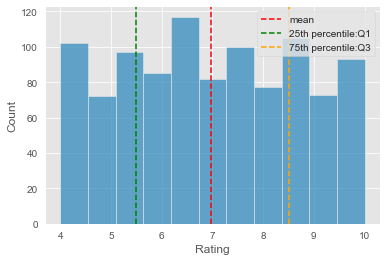

In [23]:
sns.histplot(data['Rating'])
plt.axvline(x=np.mean(data['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(data['Rating'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(data['Rating'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

In [24]:
# Question 2: Do aggregate sales numbers differ by much between branches?

C:\Users\rajp3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


A    342
B    333
C    328
Name: Branch, dtype: int64

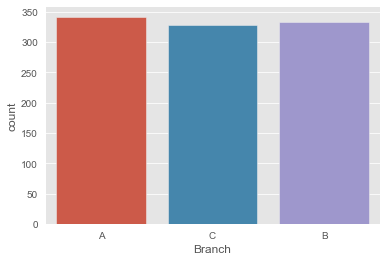

In [25]:
sns.countplot(data['Branch'])
data['Branch'].value_counts()

In [26]:
#Task 3: Bivariate Analysis
    
#Is there a relationship between gross income and customer ratings?

C:\Users\rajp3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

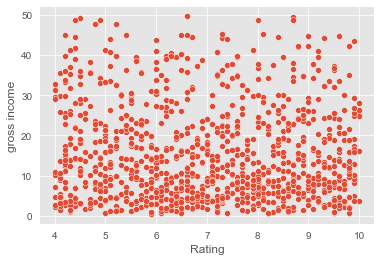

In [31]:
sns.scatterplot(data['Rating'], data['gross income'])

In [ ]:
# Task 4: Dealing With Duplicate Rows and Missing Values

    # Which branch is the most profitable

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

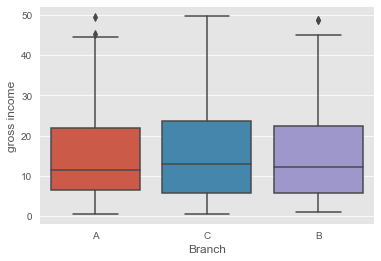

In [28]:
sns.boxplot(x=data['Branch'], y=data['gross income'])

In [29]:
#Is there any time trend in gross income?

<AxesSubplot:ylabel='gross income'>

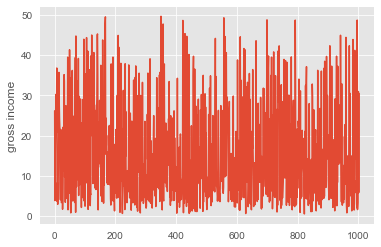

In [30]:
sns.lineplot(x= data.groupby(data.index).mean().index, 
             y = data.groupby(data.index).mean()['gross income'])